In [1]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

print('Dependencies: Imported successfully')

Dependencies: Imported successfully


In [2]:
# Create a list of African countries
afr_entities = ['Algeria', 'Angola', 'Benin', 'Botswana', 'British Indian Ocean Territory',
                 'Burkina Faso', 'Burundi', 'Cameroon', 'Cape Verde', 'Central African Republic',
                 'Chad', 'Comoros', 'Congo', 'Djibouti', 'Egypt',
                 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon',
                 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast',
                 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar',
                 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Mayotte',
                 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria',
                 'Reunion', 'Rwanda', 'Saint Helena', 'Sao Tome and Principe', 'Senegal',
                 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan',
                 'Sudan', 'Tanzania', 'The Democratic Republic of Congo', 'Togo', 'Tunisia',
                 'Uganda', 'Western Sahara', 'Zambia', 'Zimbabwe']

In [3]:
code = r"C:\Users\Etebom\Desktop\RGN_project\datasets\codes.csv"
iso_codes = pd.read_csv(code)
iso_codes = iso_codes.rename(columns={'Country':'Entity', 'Alpha-3 code':'Code'})
iso_codes.head()

Entity Code
0     Afghanistan  AFG
1         Albania  ALB
2         Algeria  DZA
3  American Samoa  ASM
4         Andorra  AND

In [4]:
# Mapping dictionary from Entity to Code
iso_code_map = iso_codes.set_index('Entity')['Code'].to_dict()


##### Load Births Attended by health staff data and subset for African countries

In [5]:
dt1 = r"C:\Users\Etebom\Desktop\RGN_project\datasets\births-attended-by-health-staff-sdgs.csv"
dn1 = pd.read_csv(dt1)
dn1.head()

Entity Code  Year  \
0  Afghanistan  AFG  2000   
1  Afghanistan  AFG  2003   
2  Afghanistan  AFG  2006   
3  Afghanistan  AFG  2008   
4  Afghanistan  AFG  2010   

   Births attended by skilled health staff (% of total)  
0                                               12.4     
1                                               14.3     
2                                               18.9     
3                                               24.0     
4                                               34.3

In [6]:
dn1.isnull().sum()

Entity                                                   0
Code                                                    42
Year                                                     0
Births attended by skilled health staff (% of total)     0
dtype: int64

In [7]:
# Fill missing values in 'Code' using the mapping created above
dn1['Code'] = dn1['Code'].fillna(dn1['Entity'].map(iso_code_map))

dn1.Code.isnull().sum()

42

In [8]:
df1 = dn1[dn1['Entity'].isin(afr_entities)]
df1 = df1.reset_index(drop=True)
df1['Code'].isnull().sum()

0

In [9]:
df1.duplicated().sum()

0

##### Load Child mortality data and subset for African countries

In [10]:
dt2 = r"C:\Users\Etebom\Desktop\RGN_project\datasets\child-mortality-by-income-level-of-country.csv"
dn2 = pd.read_csv(dt2)
dn2.head()

Entity Code  Year  \
0  Afghanistan  AFG  1957   
1  Afghanistan  AFG  1958   
2  Afghanistan  AFG  1959   
3  Afghanistan  AFG  1960   
4  Afghanistan  AFG  1961   

   Observation value - Indicator: Under-five mortality rate - Sex: Total - Wealth quintile: Total - Unit of measure: Deaths per 100 live births  
0                                          37.245758                                                                                             
1                                          36.626625                                                                                             
2                                          36.043480                                                                                             
3                                          35.459850                                                                                             
4                                          34.894880

In [11]:
dn2.isnull().sum()

Entity                                                                                                                                             0
Code                                                                                                                                            1358
Year                                                                                                                                               0
Observation value - Indicator: Under-five mortality rate - Sex: Total - Wealth quintile: Total - Unit of measure: Deaths per 100 live births       0
dtype: int64

In [12]:
# Fill missing values in 'Code' using the mapping created above
dn2['Code'] = dn2['Code'].fillna(dn2['Entity'].map(iso_code_map))
 
dn2[dn2.Code.isnull()].head()

Entity Code  Year  \
66  Africa  NaN  1932   
67  Africa  NaN  1933   
68  Africa  NaN  1934   
69  Africa  NaN  1935   
70  Africa  NaN  1936   

    Observation value - Indicator: Under-five mortality rate - Sex: Total - Wealth quintile: Total - Unit of measure: Deaths per 100 live births  
66                                          36.631400                                                                                             
67                                          35.979073                                                                                             
68                                          35.288647                                                                                             
69                                          34.611190                                                                                             
70                                          33.982080

In [13]:
df2 = dn2[dn2['Entity'].isin(afr_entities)]
df2 = df2.reset_index(drop=True)
df2.Code.isnull().sum()

0

In [14]:
dn2.duplicated().sum()

0

##### Load Cause of child mortality data and subset for African countries

In [15]:
dt3 = r"C:\Users\Etebom\Desktop\RGN_project\datasets\Distribution of Causes of Death among Children Aged less than 5 years.csv"
dn3 = pd.read_csv(dt3)
dt = dn3[['Location', 'SpatialDimValueCode', 'Period', 'Dim2']].copy()
dt.rename(columns={
    'Location':'Entity',
    'SpatialDimValueCode': 'Code',
    'Period':'Year',
    'Dim2':'Cause of Death'
} ,
    inplace=True)

dt = dt[dt['Entity'].isin(afr_entities)]
dt = dt.reset_index(drop=True)
dt['Code'].isnull().sum()


0

In [16]:
dt.duplicated().sum()

25200

In [17]:
dt = dt.drop_duplicates()
dt.shape

(12600, 4)

##### Load Global vaccination coverage data and subset for African countries

In [18]:
dt4 = r"C:\Users\Etebom\Desktop\RGN_project\datasets\global-vaccination-coverage.csv"
dn4 = pd.read_csv(dt4)
dn4.isnull().sum()

Entity                                     0
Code                                     252
Year                                       0
BCG (% of one-year-olds immunized)      1400
HepB3 (% of one-year-olds immunized)    3461
Hib3 (% of one-year-olds immunized)     4268
IPV1 (% of one-year-olds immunized)     6600
MCV1 (% of one-year-olds immunized)      169
PCV3 (% of one-year-olds immunized)     6400
Pol3 (% of one-year-olds immunized)       42
RCV1 (% of one-year-olds immunized)     3699
RotaC (% of one-year-olds immunized)    6858
YFV (% of one-year-olds immunized)      7073
DTP3 (% of one-year-olds immunized)       43
dtype: int64

In [19]:
#Fill missing values in 'Code' using the mapping created above
dn4['Code'] = dn4['Code'].fillna(dn4['Entity'].map(iso_code_map))

df4 = dn4[dn4['Entity'].isin(afr_entities)].copy()
df4.Code.isnull().sum()

0

In [20]:
df4 = dn4[dn4['Entity'].isin(afr_entities)]
df4 = df4.reset_index(drop=True)
df4.Code.isnull().sum()

0

In [21]:
df4.duplicated().sum()

0

##### Load Health protection coverage data and subset for African countries

In [22]:
dt5 = r"C:\Users\Etebom\Desktop\RGN_project\datasets\health-protection-coverage.csv"
dn5 = pd.read_csv(dt5)
dn5.isnull().sum()

Entity                                                          0
Code                                                            0
Year                                                            0
Share of population covered by health insurance (ILO (2014))    0
dtype: int64

In [23]:
df5 = dn5[dn5['Entity'].isin(afr_entities)]
df5 = df5.reset_index(drop=True)
df5.head()

Entity Code  Year  \
0       Algeria  DZA  2005   
1        Angola  AGO  2010   
2         Benin  BEN  2009   
3  Burkina Faso  BFA  2010   
4       Burundi  BDI  2009   

   Share of population covered by health insurance (ILO (2014))  
0                                               85.2             
1                                                0.0             
2                                                9.0             
3                                                1.0             
4                                               28.4

In [24]:
df5.duplicated().sum()

0

##### Load Infant mortality data and subset for African countries

In [25]:
dt6 = r"C:\Users\Etebom\Desktop\RGN_project\datasets\number-of-infant-deaths-unwpp.csv"
dn6 = pd.read_csv(dt6)
dn6.isnull().sum()

Entity                                                0
Code                                               1332
Year                                                  0
Deaths - Sex: all - Age: 0 - Variant: estimates       0
dtype: int64

In [26]:
dn6['Code'] = dn6['Code'].fillna(dn6['Entity'].map(iso_code_map))
 
df6 = dn6[dn6['Entity'].isin(afr_entities)].copy()
df6.Code.isnull().sum()

0

In [27]:
df6.duplicated().sum()

0

##### Load Maternal mortality data and subset for African countries

In [28]:
dt7 = r"C:\Users\Etebom\Desktop\RGN_project\datasets\number-of-maternal-deaths-by-region.csv"
dn7 = pd.read_csv(dt7)
dn7.isnull().sum()

Entity                          0
Code                          360
Year                            0
Estimated maternal deaths       0
959828-annotations           7020
dtype: int64

In [29]:
dn7['Code'] = dn7['Code'].fillna(dn7['Entity'].map(iso_code_map))


In [30]:
df7 = dn7[dn7['Entity'].isin(afr_entities)]
df7 = df7.reset_index(drop=True)
df7.Code.isnull().sum()

0

In [31]:
dn7.duplicated().sum()

0

##### Load Youth mortality data and subset for African countries

In [32]:
dt8 = r"C:\Users\Etebom\Desktop\RGN_project\datasets\youth-mortality-rate.csv"
dn8 = pd.read_csv(dt8)
dn8.isnull().sum()

Entity                             0
Code                            1023
Year                               0
Under-fifteen mortality rate       0
dtype: int64

In [33]:
dn8['Code'] = dn8['Code'].fillna(dn8['Entity'].map(iso_code_map))

dn8.Code.isnull().sum()

1023

In [34]:
df8 = dn8[dn8['Entity'].isin(afr_entities)]
df8 = df8.reset_index(drop=True)

df8.Code.isnull().sum()

0

In [35]:
df8.duplicated().sum()

0

##### Concatenate all dataframes

In [36]:
# Create a list of dataframes
dfs = [df1, df2, df4, df5, df6, df7, df8, dt]

# Concatenate all 8 dataframes into a single Dataframe
dn = pd.concat(dfs, ignore_index=True).drop_duplicates()
dn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26797 entries, 0 to 26796
Data columns (total 22 columns):
 #   Column                                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                                        --------------  -----  
 0   Entity                                                                                                                                        26797 non-null  object 
 1   Code                                                                                                                                          26797 non-null  object 
 2   Year                                                                                                                                          26797 non-null  int64  
 3   Births attended by skilled heal

In [37]:
# Rename lengthy columns
dn = dn.rename(
    columns = {
        'Births attended by skilled health staff (% of total)': 'Births attended',
        'Observation value - Indicator: Under-five mortality rate - Sex: Total - Wealth quintile: Total - Unit of measure: Deaths per 100 live births': 'Under five mortality (per 100 live births)',
        'Share of population covered by health insurance (ILO (2014))': 'Have insurance',
        'Deaths - Sex: all - Age: 0 - Variant: estimates':'Infant mortality'
    }
)

dn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26797 entries, 0 to 26796
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity                                      26797 non-null  object 
 1   Code                                        26797 non-null  object 
 2   Year                                        26797 non-null  int64  
 3   Births attended                             404 non-null    float64
 4   Under five mortality (per 100 live births)  3394 non-null   float64
 5   BCG (% of one-year-olds immunized)          2008 non-null   float64
 6   HepB3 (% of one-year-olds immunized)        970 non-null    float64
 7   Hib3 (% of one-year-olds immunized)         749 non-null    float64
 8   IPV1 (% of one-year-olds immunized)         302 non-null    float64
 9   MCV1 (% of one-year-olds immunized)         1993 non-null   float64
 10  PCV3 (% of

In [38]:
# Descriptive statistics
dn.describe().round(2).T

count      mean       std  \
Year                                        26797.0   2000.79     15.93   
Births attended                               404.0     62.97     25.72   
Under five mortality (per 100 live births)   3394.0     15.37      9.13   
BCG (% of one-year-olds immunized)           2008.0     80.33     20.60   
HepB3 (% of one-year-olds immunized)          970.0     80.77     17.78   
Hib3 (% of one-year-olds immunized)           749.0     80.43     17.72   
IPV1 (% of one-year-olds immunized)           302.0     68.24     25.45   
MCV1 (% of one-year-olds immunized)          1993.0     68.24     22.53   
PCV3 (% of one-year-olds immunized)           383.0     76.42     20.83   
Pol3 (% of one-year-olds immunized)          2003.0     68.92     24.93   
RCV1 (% of one-year-olds immunized)           288.0     89.17     11.04   
RotaC (% of one-year-olds immunized)          306.0     77.20     20.71   
YFV (% of one-year-olds immunized)            440.0     58.19     24.42   
DTP3 (% of one-year-olds immunized)          2002.0     68.99     25.02   
Have insurance                                 37.0     28.31     33.98   
Infant mortality                             4144.0  38620.21  72940.34   
Estimated maternal deaths                    1872.0   3925.91   9601.38   
Under-fifteen mortality rate                 2324.0     13.79      8.27   

                                                min      25%       50%  \
Year                                        1932.00  1995.00   2005.00   
Births attended                                5.00    43.88     60.80   
Under five mortality (per 100 live births)     1.03     8.04     13.93   
BCG (% of one-year-olds immunized)             2.00    72.00     88.00   
HepB3 (% of one-year-olds immunized)           1.00    74.00     87.00   
Hib3 (% of one-year-olds immunized)            1.00    73.00     87.00   
IPV1 (% of one-year-olds immunized)            0.00    49.25     74.00   
MCV1 (% of one-year-olds immunized)            1.00    53.00     73.00   
PCV3 (% of one-year-olds immunized)            1.00    67.00     83.00   
Pol3 (% of one-year-olds immunized)            1.00    52.50     75.00   
RCV1 (% of one-year-olds immunized)           29.00    87.00     92.00   
RotaC (% of one-year-olds immunized)           2.00    68.00     85.00   
YFV (% of one-year-olds immunized)             1.00    41.00     63.00   
DTP3 (% of one-year-olds immunized)            1.00    51.00     77.00   
Have insurance                                 0.00     2.10      9.00   
Infant mortality                               0.00  2538.50  19897.00   
Estimated maternal deaths                      0.06   282.95   1682.87   
Under-fifteen mortality rate                   1.27     7.43     12.23   

                                                 75%        max  
Year                                         2012.00    2023.00  
Births attended                                86.68     100.00  
Under five mortality (per 100 live births)     21.55      42.63  
BCG (% of one-year-olds immunized)             95.00      99.00  
HepB3 (% of one-year-olds immunized)           94.00      99.00  
Hib3 (% of one-year-olds immunized)            94.00      99.00  
IPV1 (% of one-year-olds immunized)            90.00      99.00  
MCV1 (% of one-year-olds immunized)            87.00      99.00  
PCV3 (% of one-year-olds immunized)            91.50      99.00  
Pol3 (% of one-year-olds immunized)            89.00      99.00  
RCV1 (% of one-year-olds immunized)            97.00      99.00  
RotaC (% of one-year-olds immunized)           91.00      99.00  
YFV (% of one-year-olds immunized)             78.00      97.00  
DTP3 (% of one-year-olds immunized)            89.00      99.00  
Have insurance                                 42.30     100.00  
Infant mortality                            46720.25  608109.00  
Estimated maternal deaths                    3966.90   86380.27  
Under-fifteen mortality r

In [39]:
# Drop Metadata column
dn = dn.drop(
    columns = '959828-annotations'
)

dn.head()

Entity Code  Year  Births attended  \
0  Algeria  DZA  1992             76.5   
1  Algeria  DZA  2000             92.0   
2  Algeria  DZA  2002             95.9   
3  Algeria  DZA  2006             95.2   
4  Algeria  DZA  2013             96.6   

   Under five mortality (per 100 live births)  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   

   BCG (% of one-year-olds immunized)  HepB3 (% of one-year-olds immunized)  \
0                                 NaN                                   NaN   
1                                 NaN                                   NaN   
2                                 NaN                                   NaN   
3                                 NaN                                   NaN   
4                                 NaN                                   NaN   

   Hib3 (% of one-year-olds immunized)  IPV1 (% of one-year-olds immunized)  \
0                                  NaN                                  NaN   
1                                  NaN                                  NaN   
2                                  NaN                                  NaN   
3                                  NaN                                  NaN   
4                                  NaN                                  NaN   

   MCV1 (% of one-year-olds immunized)  ...  \
0                                  NaN  ...   
1                                  NaN  ...   
2                                  NaN  ...   
3                                  NaN  ...   
4                                  NaN  ...   

   Pol3 (% of one-year-olds immunized)  RCV1 (% of one-year-olds immunized)  \
0                                  NaN                                  NaN   
1                                  NaN                                  NaN   
2                                  NaN                                  NaN   
3                                  NaN                                  NaN   
4                                  NaN                                  NaN   

   RotaC (% of one-year-olds immunized)  YFV (% of one-year-olds immunized)  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   

   DTP3 (% of one-year-olds immunized)  Have insurance  Infant mortality  \
0                                  NaN             NaN               NaN   
1                                  NaN             NaN               NaN   
2                                  NaN             NaN               NaN   
3                                  NaN             NaN               NaN   
4                                  NaN             NaN               NaN   

   Estimated maternal deaths  Under-fifteen mortality rate  Cause of Death  
0                        NaN                           NaN             NaN  
1                        NaN                           NaN             NaN  
2                        NaN                           NaN             NaN  
3                        NaN                           NaN             NaN  
4                        NaN                           NaN             NaN  

[5 rows x 21 columns]

In [40]:
dn.shape

(26797, 21)

In [41]:
# Percentage of missing values
(dn.isnull().mean() * 100).round(2)

Entity                                         0.00
Code                                           0.00
Year                                           0.00
Births attended                               98.49
Under five mortality (per 100 live births)    87.33
BCG (% of one-year-olds immunized)            92.51
HepB3 (% of one-year-olds immunized)          96.38
Hib3 (% of one-year-olds immunized)           97.20
IPV1 (% of one-year-olds immunized)           98.87
MCV1 (% of one-year-olds immunized)           92.56
PCV3 (% of one-year-olds immunized)           98.57
Pol3 (% of one-year-olds immunized)           92.53
RCV1 (% of one-year-olds immunized)           98.93
RotaC (% of one-year-olds immunized)          98.86
YFV (% of one-year-olds immunized)            98.36
DTP3 (% of one-year-olds immunized)           92.53
Have insurance                                99.86
Infant mortality                              84.54
Estimated maternal deaths                     93.01
Under-fiftee

### EXPLORATORY DATA NALYSIS

#### TOP FIVE AFRICAN COUNTRIES BY CHILD MORTALITY RATE

In [42]:
dn_u5 = dn.groupby('Entity', as_index=False)['Under five mortality (per 100 live births)'].sum()
dn_u5_sorted = dn_u5.sort_values(by='Under five mortality (per 100 live births)', ascending=False)
dn_u5_sorted.head()

Entity  Under five mortality (per 100 live births)
21        Guinea                                 2206.498029
4   Burkina Faso                                 1903.583849
44  Sierra Leone                                 1725.104848
47   South Sudan                                 1650.220149
2          Benin                                 1636.001028

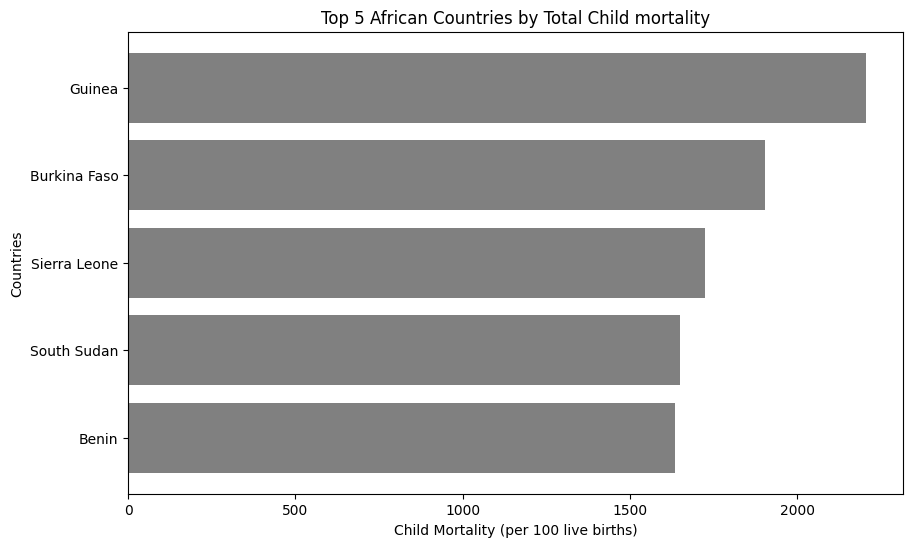

In [43]:
# Bar chart
plt.figure(figsize=(10, 6))
plt.barh(dn_u5_sorted['Entity'].head(),
         dn_u5_sorted['Under five mortality (per 100 live births)'].head(),
         color='gray')

plt.xlabel('Child Mortality (per 100 live births)')
plt.ylabel('Countries')
plt.title('Top 5 African Countries by Total Child mortality')
plt.gca().invert_yaxis()
plt.show()


#### YEARS WITH HIGHEST CHILD MORTALITY RATES IN AFRICA

In [44]:
dn_y5 = dn.groupby('Year', as_index=False)['Under five mortality (per 100 live births)'].sum()
dn_y5_sorted = dn_y5.sort_values(by='Under five mortality (per 100 live births)', ascending=False) 
dn_y5_sorted.head(7)

Year  Under five mortality (per 100 live births)
35  1967                                  950.967523
36  1968                                  950.868416
40  1972                                  945.837673
38  1970                                  944.220344
42  1974                                  940.524355
37  1969                                  935.885199
39  1971                                  929.131457

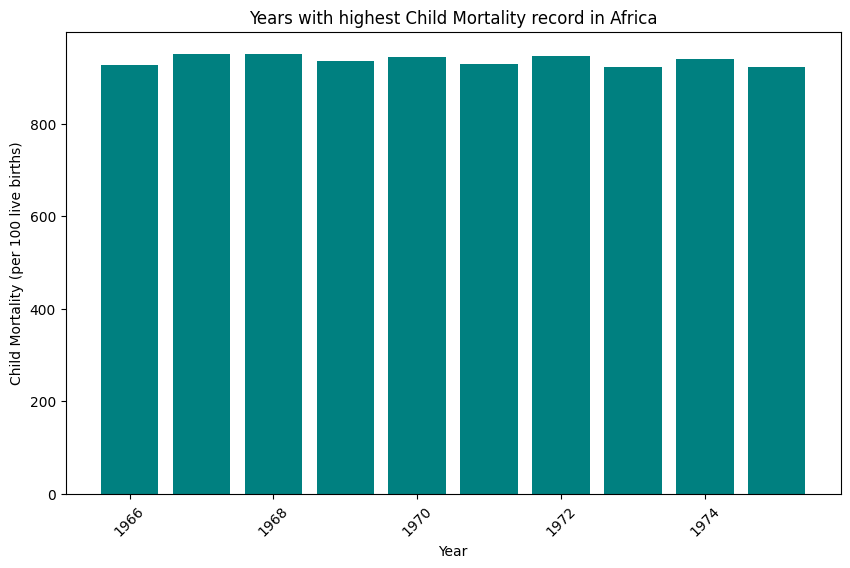

In [45]:
# Column chart
plt.figure(figsize=(10, 6))
plt.bar(dn_y5_sorted['Year'].head(10),
        dn_y5_sorted['Under five mortality (per 100 live births)'].head(10),
        color='teal')

plt.xlabel('Year')
plt.ylabel('Child Mortality (per 100 live births)')
plt.title('Years with highest Child Mortality record in Africa')
plt.xticks(rotation=45) 
plt.show()


#### TOP SEVEN AFRICAN COUNTRIES BY INFANT MORTALITY RATE

In [46]:
dn_im = dn.groupby('Entity', as_index=False)['Infant mortality'].sum()
dn_im_sorted = dn_im.sort_values(by='Infant mortality', ascending=False) 
dn_im_sorted.head(7)

Entity  Infant mortality
37     Nigeria      3.472252e+07
17    Ethiopia      1.618226e+07
13       Egypt      1.087222e+07
49    Tanzania      6.558125e+06
34  Mozambique      5.541082e+06
52      Uganda      5.162614e+06
1       Angola      4.950600e+06

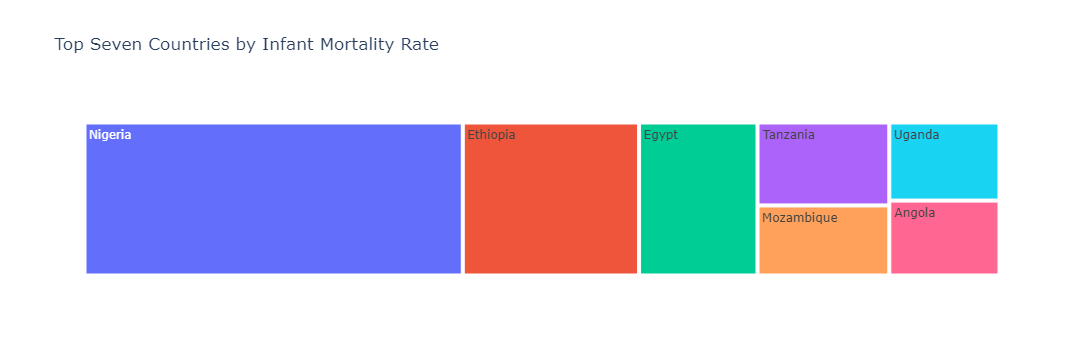

In [47]:
# Treemap
fig = px.treemap(dn_im_sorted.head(7),
                 path=['Entity'],
                 values='Infant mortality',
                 title='Top Seven Countries by Infant Mortality Rate')

fig.show()


#### YEARS WITH HIGHEST INFANT MORTALITY RECORDS IN AFRICA

In [48]:
dn_yim = dn.groupby('Year', as_index=False)['Infant mortality'].sum()
dn_yim_sorted = dn_yim.sort_values(by='Infant mortality', ascending=False) 
dn_yim_sorted.head()

Year  Infant mortality
66  1998       2499629.999
60  1992       2496874.000
62  1994       2486827.000
59  1991       2482628.970
65  1997       2480055.000

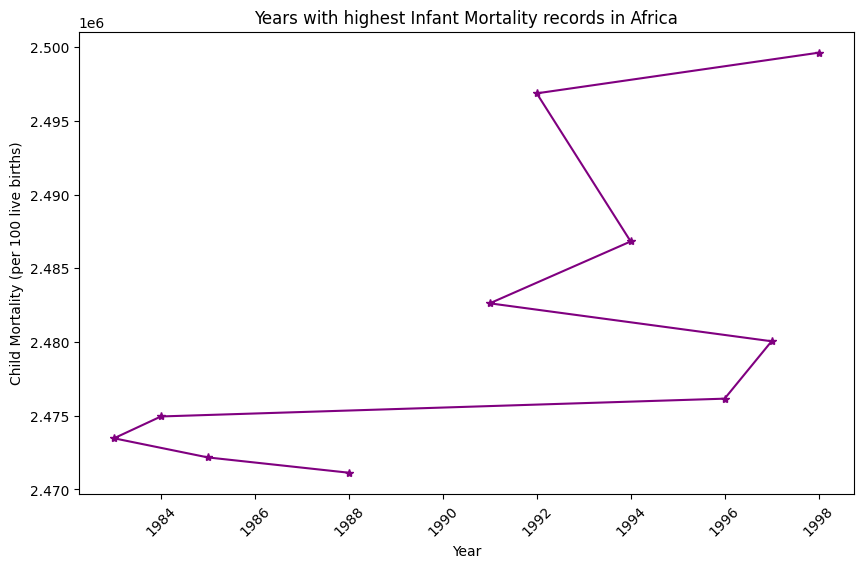

In [49]:
# Column chart
plt.figure(figsize=(10, 6))
plt.plot(dn_yim_sorted['Year'].head(10),
        dn_yim_sorted['Infant mortality'].head(10),
        color='purple',
        marker='*')

plt.xlabel('Year')
plt.ylabel('Child Mortality (per 100 live births)')
plt.title('Years with highest Infant Mortality records in Africa')
plt.xticks(rotation=45) 
plt.show()


#### TOTAL MATERNAL MORTALITY BY AFRICAN COUNTRIES

In [50]:
dn_emd = dn.groupby('Entity', as_index=False)['Estimated maternal deaths'].sum()
dn_emd_sorted = dn_emd.sort_values(by='Estimated maternal deaths', ascending=False)
dn_emd_sorted.head()

Entity  Estimated maternal deaths
37      Nigeria               2.352690e+06
17     Ethiopia               8.502036e+05
49     Tanzania               3.282542e+05
47  South Sudan               2.774615e+05
48        Sudan               2.468577e+05

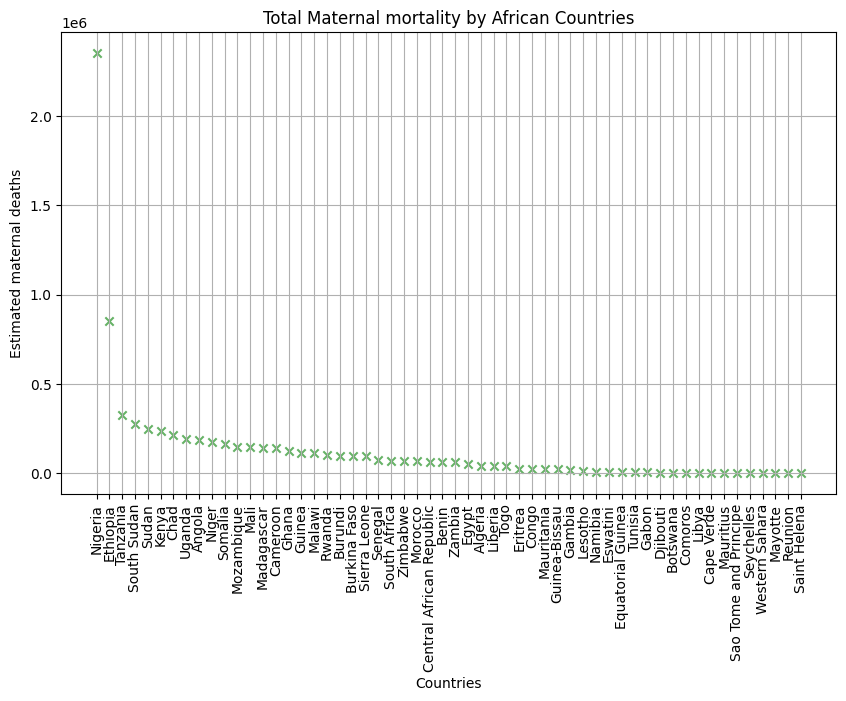

In [51]:
# Scatter plot
plt.figure(figsize=(10, 6))

x = dn_emd_sorted['Entity']
y = dn_emd_sorted['Estimated maternal deaths']

plt.scatter(x, y, marker='x', color='green', alpha=0.6)

plt.xlabel('Countries')
plt.ylabel('Estimated maternal deaths')
plt.xticks(rotation=90)
plt.title('Total Maternal mortality by African Countries')

plt.grid(True)

plt.show()


#### MATERNAL MORTALITY TREND OVER THE YEARS

In [52]:
dn_yemd = dn.groupby('Year', as_index=False)['Estimated maternal deaths'].sum()
dn_yemd_sorted = dn_yemd.sort_values(by='Estimated maternal deaths', ascending=False)
dn_yemd_sorted.head()

Year  Estimated maternal deaths
66  1998              224973.678835
61  1993              221674.881165
60  1992              220388.192562
62  1994              215607.199525
64  1996              214382.886078

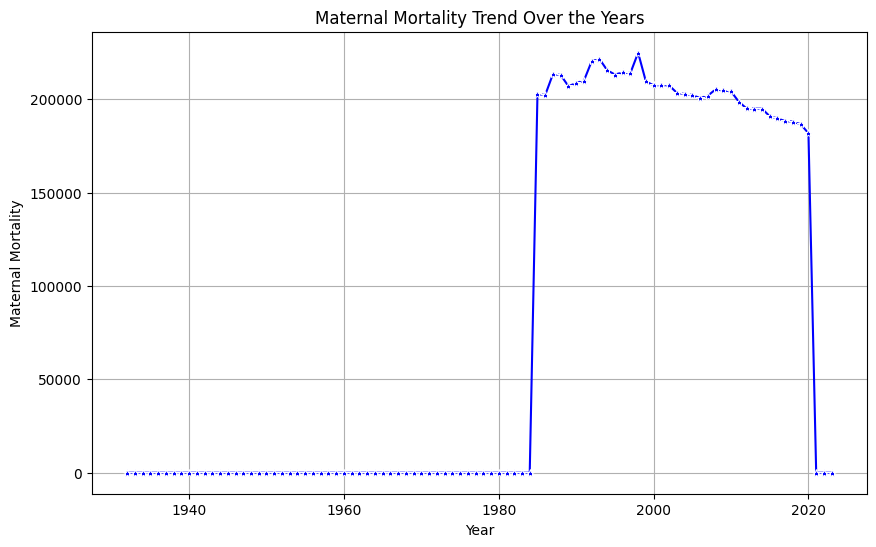

In [53]:
# lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=dn_yemd_sorted,
             x='Year',
             y='Estimated maternal deaths',
             marker='*',
             color='b')

plt.title('Maternal Mortality Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Maternal Mortality')
plt.grid(True)

plt.show()

#### AFRICAN COUNTRIES BY YOUTH MORTALITY RATE

In [54]:
#dn_hi = dn.dropna(subset=['Have insurance'])
dn_u15 = dn.groupby('Entity', as_index=False)['Under-fifteen mortality rate'].sum()
dn_u15_sorted = dn_u15.sort_values(by='Under-fifteen mortality rate', ascending=False)
dn_u15_sorted.head()

Entity  Under-fifteen mortality rate
21   Guinea                   1932.985120
50     Togo                   1136.548995
36    Niger                   1092.273911
5   Burundi                   1078.015947
29     Mali                   1048.434731

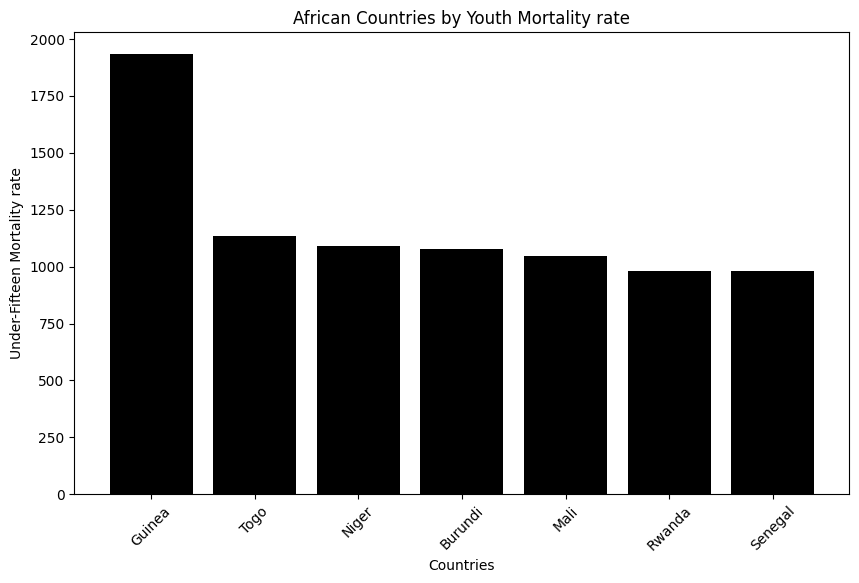

In [55]:
# Column chart
plt.figure(figsize=(10, 6))
plt.bar(dn_u15_sorted['Entity'].head(7),
        dn_u15_sorted['Under-fifteen mortality rate'].head(7),
        color='black')

plt.xlabel('Countries')
plt.ylabel('Under-Fifteen Mortality rate')
plt.title('African Countries by Youth Mortality rate')
plt.xticks(rotation=45)
plt.show()


In [56]:
dn_yu15 = dn.groupby('Year', as_index=False)['Under-fifteen mortality rate'].sum()
dn_yu15_sorted = dn_yu15.sort_values(by='Under-fifteen mortality rate', ascending=False)
dn_yu15_sorted.head()

Year  Under-fifteen mortality rate
58  1990                    890.528835
62  1994                    879.468937
59  1991                    878.478944
60  1992                    868.757929
61  1993                    864.078422

In [57]:
# Create a list of Country, Year, and Infant Immunization rates
dn_ized = dn.columns[dn.columns.str.endswith(('ized)', 'tity', 'ear'))].tolist()
dn_ized

['Entity',
 'Year',
 'BCG (% of one-year-olds immunized)',
 'HepB3 (% of one-year-olds immunized)',
 'Hib3 (% of one-year-olds immunized)',
 'IPV1 (% of one-year-olds immunized)',
 'MCV1 (% of one-year-olds immunized)',
 'PCV3 (% of one-year-olds immunized)',
 'Pol3 (% of one-year-olds immunized)',
 'RCV1 (% of one-year-olds immunized)',
 'RotaC (% of one-year-olds immunized)',
 'YFV (% of one-year-olds immunized)',
 'DTP3 (% of one-year-olds immunized)']

In [58]:
# Create a dataframe for Infant Immunization rates
df = dn[dn_ized]
coln = dn_ized[2:]
df = df.dropna(subset=coln, how='all').reset_index()
df = df.drop(columns='index')
df.head()

Entity  Year  BCG (% of one-year-olds immunized)  \
0  Algeria  1985                                86.0   
1  Algeria  1986                                88.0   
2  Algeria  1987                                93.0   
3  Algeria  1988                                96.0   
4  Algeria  1989                                96.0   

   HepB3 (% of one-year-olds immunized)  Hib3 (% of one-year-olds immunized)  \
0                                   NaN                                  NaN   
1                                   NaN                                  NaN   
2                                   NaN                                  NaN   
3                                   NaN                                  NaN   
4                                   NaN                                  NaN   

   IPV1 (% of one-year-olds immunized)  MCV1 (% of one-year-olds immunized)  \
0                                  NaN                                 68.0   
1                                  NaN                                 67.0   
2                                  NaN                                 73.0   
3                                  NaN                                 81.0   
4                                  NaN                                 82.0   

   PCV3 (% of one-year-olds immunized)  Pol3 (% of one-year-olds immunized)  \
0                                  NaN                                 69.0   
1                                  NaN                                 72.0   
2                                  NaN                                 79.0   
3                                  NaN                                 85.0   
4                                  NaN                                 87.0   

   RCV1 (% of one-year-olds immunized)  RotaC (% of one-year-olds immunized)  \
0                                  NaN                                   NaN   
1                                  NaN                                   NaN   
2                                  NaN                                   NaN   
3                                  NaN                                   NaN   
4                                  NaN                                   NaN   

   YFV (% of one-year-olds immunized)  DTP3 (% of one-year-olds immunized)  
0                                 NaN                                 69.0  
1                                 NaN                                 73.0  
2                                 NaN                                 79.0  
3                                 NaN                                 85.0  
4                                 NaN                                 87.0

In [59]:
# Correlation matrix of Infant Immunization rates
dc = df[dn_ized[2:]]
correlation_matrix = dc.corr()  # Pearson correlation by default
correlation_matrix


BCG (% of one-year-olds immunized)  \
BCG (% of one-year-olds immunized)                              1.000000   
HepB3 (% of one-year-olds immunized)                            0.725744   
Hib3 (% of one-year-olds immunized)                             0.783865   
IPV1 (% of one-year-olds immunized)                             0.424517   
MCV1 (% of one-year-olds immunized)                             0.866096   
PCV3 (% of one-year-olds immunized)                             0.508547   
Pol3 (% of one-year-olds immunized)                             0.874771   
RCV1 (% of one-year-olds immunized)                             0.746375   
RotaC (% of one-year-olds immunized)                            0.410455   
YFV (% of one-year-olds immunized)                              0.530739   
DTP3 (% of one-year-olds immunized)                             0.883120   

                                      HepB3 (% of one-year-olds immunized)  \
BCG (% of one-year-olds immunized)                                0.725744   
HepB3 (% of one-year-olds immunized)                              1.000000   
Hib3 (% of one-year-olds immunized)                               0.937968   
IPV1 (% of one-year-olds immunized)                               0.538065   
MCV1 (% of one-year-olds immunized)                               0.829150   
PCV3 (% of one-year-olds immunized)                               0.657371   
Pol3 (% of one-year-olds immunized)                               0.832473   
RCV1 (% of one-year-olds immunized)                               0.898842   
RotaC (% of one-year-olds immunized)                              0.496939   
YFV (% of one-year-olds immunized)                                0.548457   
DTP3 (% of one-year-olds immunized)                               0.858592   

                                      Hib3 (% of one-year-olds immunized)  \
BCG (% of one-year-olds immunized)                               0.783865   
HepB3 (% of one-year-olds immunized)                             0.937968   
Hib3 (% of one-year-olds immunized)                              1.000000   
IPV1 (% of one-year-olds immunized)                              0.542367   
MCV1 (% of one-year-olds immunized)                              0.888240   
PCV3 (% of one-year-olds immunized)                              0.639418   
Pol3 (% of one-year-olds immunized)                              0.895799   
RCV1 (% of one-year-olds immunized)                              0.859732   
RotaC (% of one-year-olds immunized)                             0.498848   
YFV (% of one-year-olds immunized)                               0.482330   
DTP3 (% of one-year-olds immunized)                              0.922618   

                                      IPV1 (% of one-year-olds immunized)  \
BCG (% of one-year-olds immunized)                               0.424517   
HepB3 (% of one-year-olds immunized)                             0.538065   
Hib3 (% of one-year-olds immunized)                              0.542367   
IPV1 (% of one-year-olds immunized)                              1.000000   
MCV1 (% of one-year-olds immunized)                              0.511483   
PCV3 (% of one-year-olds immunized)                              0.337422   
Pol3 (% of one-year-olds immunized)                              0.533469   
RCV1 (% of one-year-olds immunized)                              0.321818   
RotaC (% of one-year-olds immunized)                             0.279192   
YFV (% of one-year-olds immunized)                               0.221604   
DTP3 (% of one-year-olds immunized)                              0.537773   

                                      MCV1 (% of one-year-olds immunized)  \
BCG (% of one-year-olds immunized)                               0.866096   
HepB3 (% of one-year-olds immunized)                             0.829150   
Hib3 (% of one-year-olds immunized)                              0.888240   
IPV1 (% of one-year-olds immun

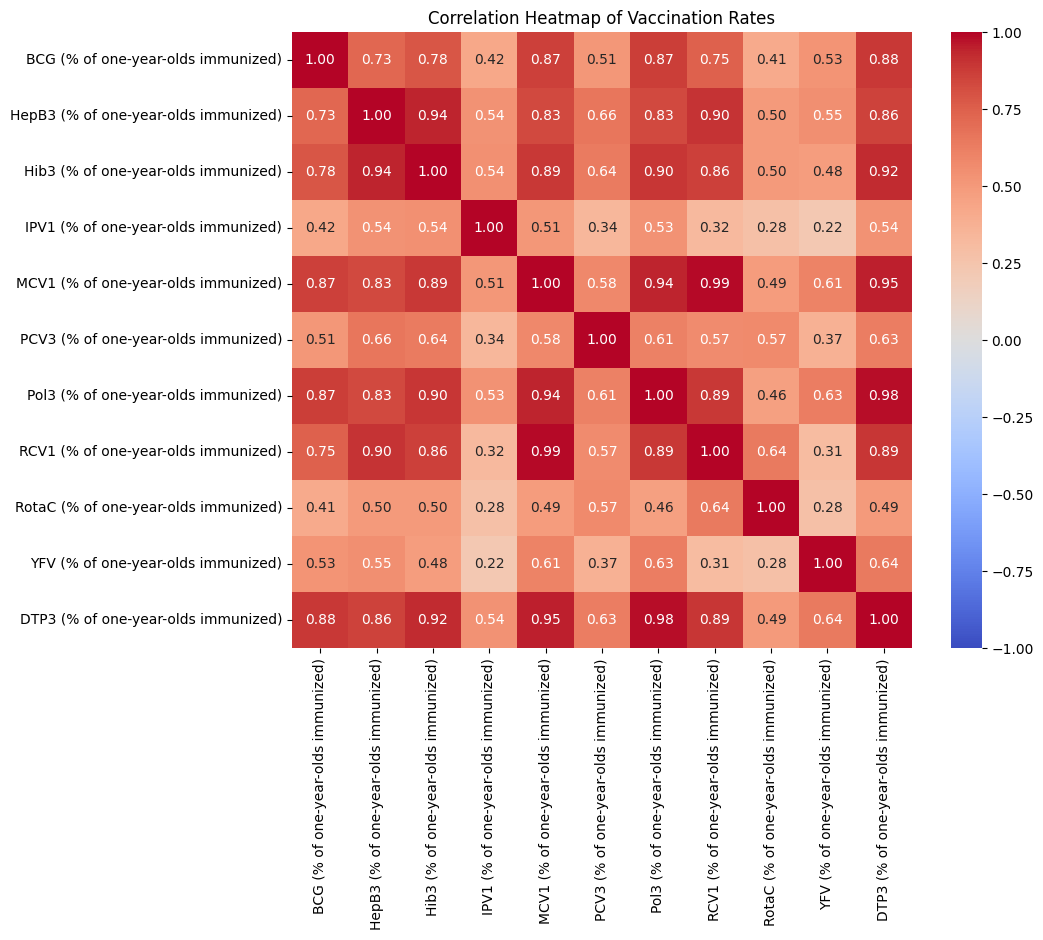

In [60]:
# Correlation Heatmap of Infant immunization rates
plt.figure(figsize=(10, 8)) 

sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            vmin=-1,
            vmax=1)

plt.title('Correlation Heatmap of Vaccination Rates')

plt.show()


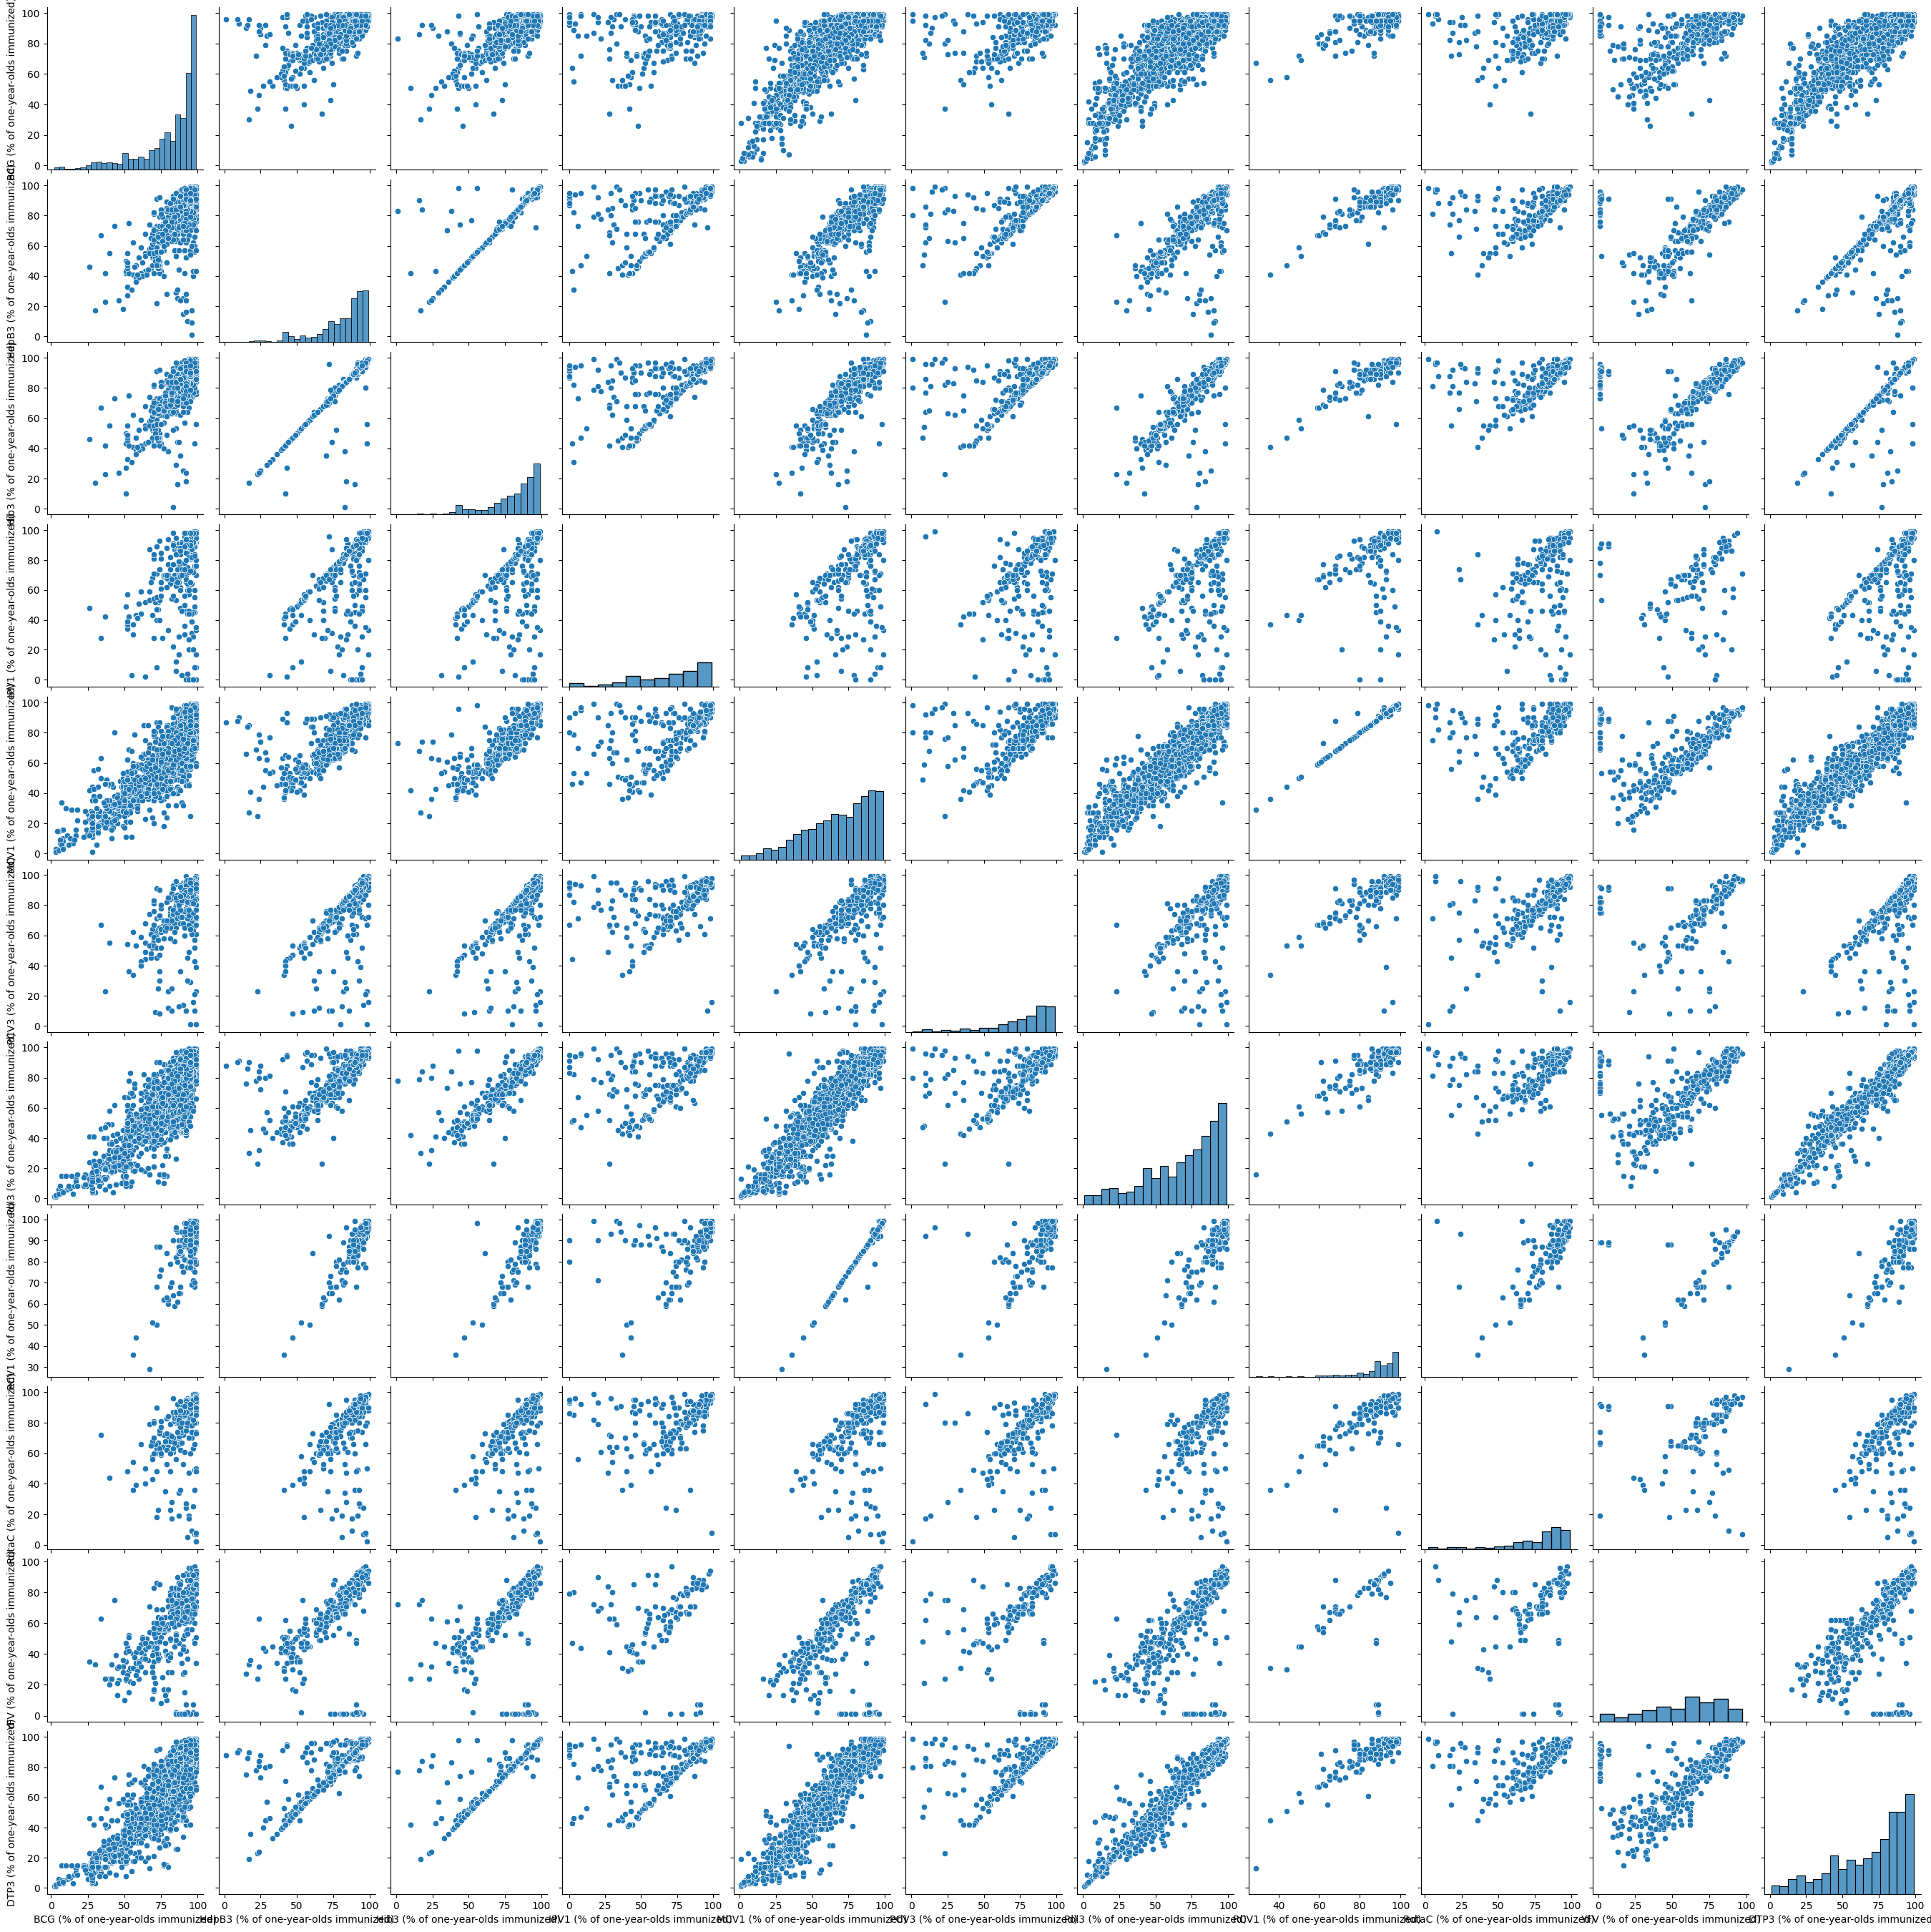

In [61]:
# Pairplots of infant immunization rates
sns.pairplot(dc)
plt.show()

In [ ]:
# Stacked Bar Chart
plt.figure(figsize=(12, 8))

bottom_values = [0] * len(df)

for col in df.columns[2:]: 
    plt.barh(df['Year'], df[col], label=col, left=bottom_values)
    
    bottom_values = [bottom + value for bottom, value in zip(bottom_values, df[col])]

plt.xlabel('Mean percentage of Infants Immunized')
plt.ylabel('Year')
plt.title('Immunization Rates by Years')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout() 

plt.show()


In [90]:
# List of columns to be aggregated
df_cols = [
    'BCG (% of one-year-olds immunized)',
    'HepB3 (% of one-year-olds immunized)',
    'Hib3 (% of one-year-olds immunized)',
    'IPV1 (% of one-year-olds immunized)',
    'MCV1 (% of one-year-olds immunized)',
    'PCV3 (% of one-year-olds immunized)',
    'Pol3 (% of one-year-olds immunized)',
    'RCV1 (% of one-year-olds immunized)',
    'RotaC (% of one-year-olds immunized)',
    'YFV (% of one-year-olds immunized)',
    'DTP3 (% of one-year-olds immunized)'
]

# Grouping and aggregating
df_grouped = df.groupby('Entity', as_index=False)[df_cols].agg('mean').round(2)

# Sorting by all columns in descending order
df_grp_sorted = df_grouped.sort_values(by=df_cols, ascending=[False] * len(df_cols))

df_grp_sorted


Entity  BCG (% of one-year-olds immunized)  \
3                   Botswana                               96.95   
0                    Algeria                               96.86   
40                Seychelles                               96.85   
7                 Cape Verde                               96.16   
19                    Gambia                               95.64   
48                   Tunisia                               94.52   
26                     Libya                               93.48   
32                   Morocco                               92.80   
23                     Kenya                               92.21   
31                 Mauritius                               92.14   
28                    Malawi                               92.12   
50                    Zambia                               91.88   
38     Sao Tome and Principe                               91.73   
24                   Lesotho                               91.64   
15                   Eritrea                               91.07   
18                     Gabon                               91.02   
16                  Eswatini                               90.95   
39                   Senegal                               90.03   
34                   Namibia                               89.23   
46                  Tanzania                               88.95   
13                     Egypt                               88.62   
51                  Zimbabwe                               87.71   
37                    Rwanda                               87.10   
4               Burkina Faso                               86.38   
20                     Ghana                               86.18   
41              Sierra Leone                               85.70   
10                   Comoros                               84.34   
5                    Burundi                               84.24   
47                      Togo                               84.24   
2                      Benin                               83.81   
22             Guinea-Bissau                               83.61   
30                Mauritania                               82.56   
43              South Africa                               80.08   
25                   Liberia                               78.91   
33                Mozambique                               77.34   
14         Equatorial Guinea                               76.92   
49                    Uganda                               76.63   
11                     Congo                               76.37   
6                   Cameroon                               72.68   
29                      Mali                               70.51   
27                Madagascar                               66.62   
12                  Djibouti                               65.35   
45                     Sudan                               64.93   
8   Central African Republic                               63.79   
21                    Guinea                               63.29   
1                     Angola                               56.67   
35                     Niger                               56.49   
44               South Sudan                               56.36   
17                  Ethiopia                               52.27   
36                   Nigeria                               50.61   
9                       Chad                               45.53   
42                   Somalia                               38.07   

    HepB3 (% of one-year-olds immunized)  Hib3 (% of one-year-olds immunized)  \
3                                  89.07                                95.00   
0                                  90.83                                93.14   
40                                 97.89                                97.67   
7                                  90.95                                94.91   
19          

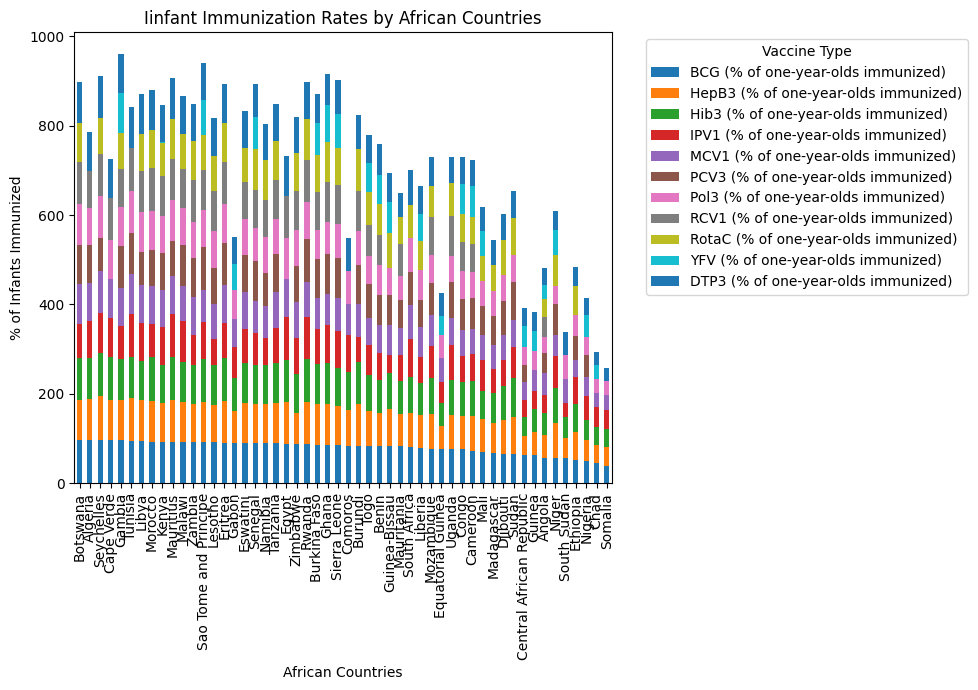

In [91]:
# Stacked Bar chart
df_grp_sorted.set_index('Entity', inplace=True)

ax = df_grp_sorted.plot(kind='bar', stacked=True, figsize=(10, 7))

ax.set_xlabel('African Countries')
ax.set_ylabel('% of Infants Immunized')
ax.set_title('Infant Immunization Rates by African Countries')

ax.legend(title='Vaccine Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout() 

plt.show()
